In [11]:
from notes.notebooks import *

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

In [81]:
from sklearn.datasets import load_iris

x, y = load_iris(return_X_y=True, as_frame=True)
x.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [246]:
from sklearn.preprocessing import StandardScaler, Normalizer

scaler = StandardScaler()
xnorm = scaler.fit_transform(x)

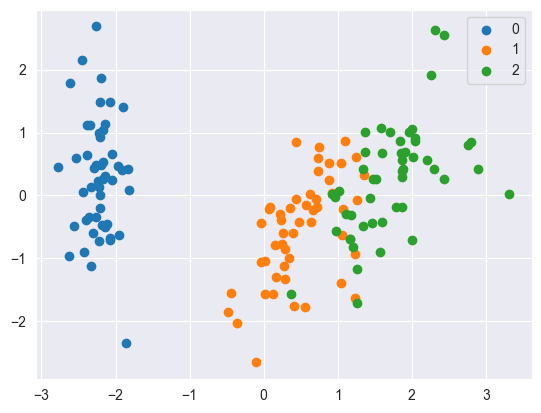

In [247]:
# autoencoder vs PCA(2)
from sklearn.decomposition import PCA

pca = PCA(2)
x2 = pca.fit_transform(xnorm)

for i in range(3):
    flag = y.values == i
    plt.scatter(x2[flag, 0], x2[flag, 1], label=i)
plt.legend()

In [248]:
ycat = tf.keras.utils.to_categorical(y)

In [193]:
import tensorflow_addons as tfa

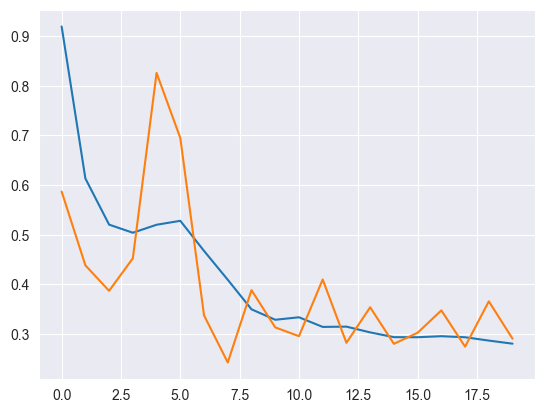

5/5 [==============================] - 0s 750us/step


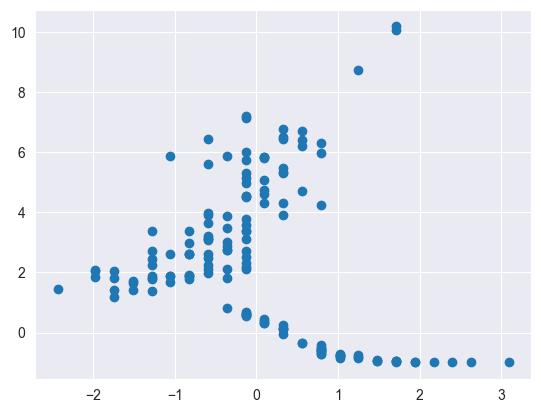

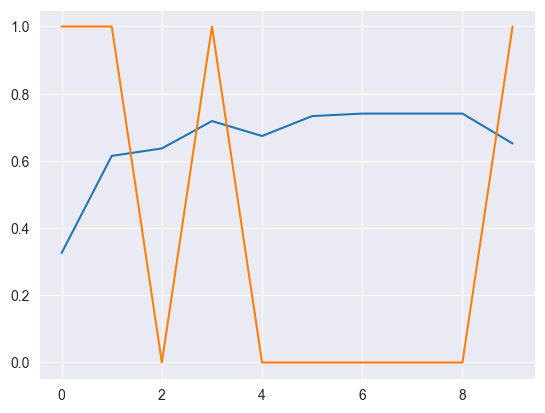

5/5 [==============================] - 0s 500us/step


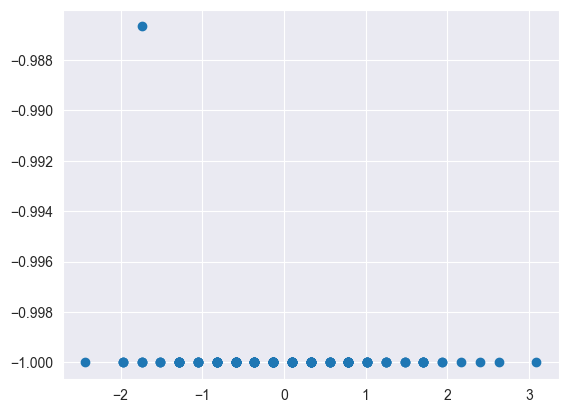

In [249]:
encoder = tf.keras.Sequential(
    [
        tf.keras.layers.InputLayer(input_shape=(4,)),
        tf.keras.layers.Dense(
            16, activation="elu", kernel_regularizer=tf.keras.regularizers.l2(1e-6)
        ),
        tf.keras.layers.Dropout(0.05),
        tf.keras.layers.Dense(8, activation="elu"),
        tf.keras.layers.Dense(4, activation="elu"),
        tf.keras.layers.Dense(2, activation="elu"),
    ]
)
decoder = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(4, activation="elu"),
        tf.keras.layers.Dense(8, activation="elu"),
        tf.keras.layers.Dense(16, activation="elu"),
        tf.keras.layers.Dense(4),
    ]
)
autoencoder = tf.keras.Sequential([encoder, decoder])
autoencoder.compile(
    loss="mse", optimizer=tf.keras.optimizers.Adam(0.1), metrics=["mae"]
)
history = autoencoder.fit(xnorm, xnorm, epochs=20, verbose=0, validation_split=0.1)

plt.plot(history.history["mae"])
plt.plot(history.history["val_mae"])
plt.show()

plt.scatter(xnorm[:, 1], encoder.predict(xnorm)[:, 1])
plt.show()

fitter = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(4, activation="elu"),
        tf.keras.layers.Dense(8, activation="elu"),
        tf.keras.layers.Dense(16, activation="elu"),
        tf.keras.layers.Dense(3, activation="softmax"),
    ]
)
model = tf.keras.Sequential([encoder, fitter])
model.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(0.1),
    metrics=["accuracy"],
)
history = model.fit(xnorm, ycat, epochs=10, verbose=0, validation_split=0.1)


plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.show()

plt.scatter(xnorm[:, 1], encoder.predict(xnorm)[:, 1])

In [236]:
pca_layer = tf.keras.layers.Dense(3)
pca = PCA(3)
pca.fit(xnorm)

PCA(n_components=3)

In [254]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression().fit(xnorm, y)

In [256]:
logreg.predict_proba(xnorm)

array([[9.84694747e-01, 1.53051914e-02, 6.20245590e-08],
       [9.43491107e-01, 5.65085053e-02, 3.87861624e-07],
       [9.82148504e-01, 1.78514072e-02, 8.83211608e-08],
       [9.75410375e-01, 2.45894406e-02, 1.84210449e-07],
       [9.91127014e-01, 8.87295346e-03, 3.29236183e-08],
       [9.88280482e-01, 1.17193982e-02, 1.19933020e-07],
       [9.90904919e-01, 9.09501238e-03, 6.83771356e-08],
       [9.80660734e-01, 1.93391643e-02, 1.02031995e-07],
       [9.69870666e-01, 3.01290911e-02, 2.43164688e-07],
       [9.61065956e-01, 3.89338659e-02, 1.78167702e-07],
       [9.84807491e-01, 1.51924530e-02, 5.64494398e-08],
       [9.85793370e-01, 1.42065405e-02, 8.93460165e-08],
       [9.58761743e-01, 4.12380758e-02, 1.81624529e-07],
       [9.88112486e-01, 1.18874786e-02, 3.53906727e-08],
       [9.90846469e-01, 9.15351596e-03, 1.52248877e-08],
       [9.96860183e-01, 3.13980303e-03, 1.38533364e-08],
       [9.91764325e-01, 8.23562846e-03, 4.60608575e-08],
       [9.82611594e-01, 1.73882

In [258]:
np.mean(logreg.predict(xnorm) == y)

0.9733333333333334

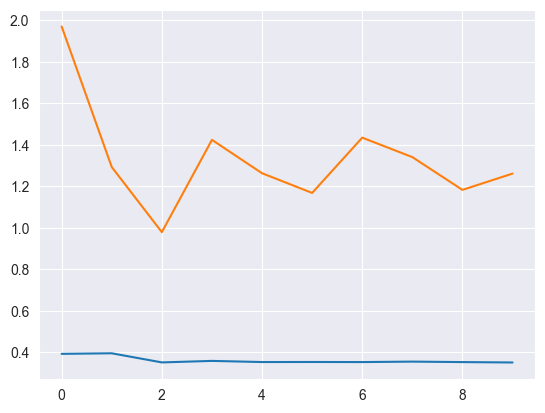

5/5 [==============================] - 0s 750us/step


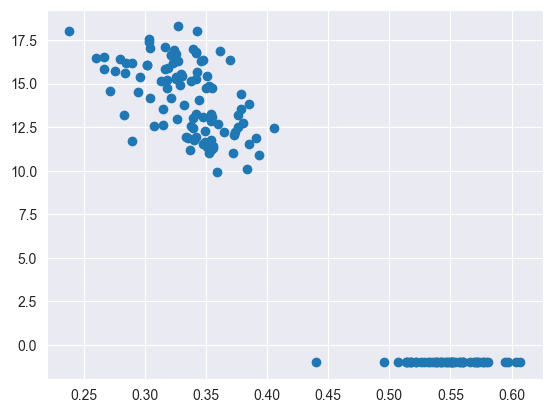

In [234]:
pls_model = tf.keras.Sequential([])
pls_model.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(0.1),
    metrics=["accuracy"],
)
history = model.fit(xnorm, ycat, epochs=10, verbose=0, validation_split=0.2)

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show()

plt.scatter(xnorm[:, 1], encoder.predict(xnorm)[:, 1])

In [250]:
prediction = model.predict(xnorm)
length = len(prediction)
y_label = np.argmax(ycat, axis=1)
predict_label = np.argmax(prediction, axis=1)

accuracy = np.sum(y_label == predict_label) / length * 100
print("Accuracy of the dataset", accuracy)

5/5 [==============================] - 0s 750us/step
Accuracy of the dataset 66.66666666666666


In [124]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(32, input_dim=4, activation="elu"),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(16, activation="elu"),
        tf.keras.layers.Dense(4, activation="elu"),
        tf.keras.layers.Dense(3, activation="softmax"),
    ]
)
model.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(1e-2),
    metrics=["accuracy"],
)

In [125]:
model.fit(xnorm, ycat, validation_split=0.1, epochs=10, verbose=1)

Epoch 1/10
5/5 [==============================] - 0s 23ms/step - loss: 1.0764 - accuracy: 0.4074 - val_loss: 1.3152 - val_accuracy: 0.0000e+00
Epoch 2/10
5/5 [==============================] - 0s 5ms/step - loss: 0.9835 - accuracy: 0.5037 - val_loss: 1.3623 - val_accuracy: 0.0000e+00
Epoch 3/10
5/5 [==============================] - 0s 5ms/step - loss: 0.8313 - accuracy: 0.7407 - val_loss: 0.8786 - val_accuracy: 0.0000e+00
Epoch 4/10
5/5 [==============================] - 0s 5ms/step - loss: 0.6311 - accuracy: 0.7333 - val_loss: 0.8569 - val_accuracy: 0.0000e+00
Epoch 5/10
5/5 [==============================] - 0s 5ms/step - loss: 0.4782 - accuracy: 0.7481 - val_loss: 0.8045 - val_accuracy: 0.0000e+00
Epoch 6/10
5/5 [==============================] - 0s 5ms/step - loss: 0.4098 - accuracy: 0.7407 - val_loss: 0.8361 - val_accuracy: 0.0000e+00
Epoch 7/10
5/5 [==============================] - 0s 5ms/step - loss: 0.3657 - accuracy: 0.8074 - val_loss: 0.6979 - val_accuracy: 0.5333
Epoch 8/1

In [204]:
prediction = model.predict(xnorm)
length = len(prediction)
y_label = np.argmax(ycat, axis=1)
predict_label = np.argmax(prediction, axis=1)

accuracy = np.sum(y_label == predict_label) / length * 100
print("Accuracy of the dataset", accuracy)

5/5 [==============================] - 0s 750us/step
Accuracy of the dataset 66.66666666666666


In [262]:
# make NN learn a step function
x = np.linspace(0, 3, 301)[:, None]
y = np.r_[np.zeros(100), np.ones(101), np.zeros(100)]

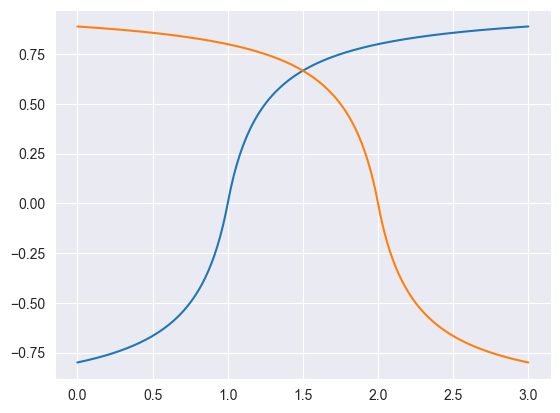

In [310]:
plt.plot(x, tf.keras.activations.softsign(4 * (x - 1)))
plt.plot(x, tf.keras.activations.softsign(4 * (2 - x)))

10/10 [==============================] - 0s 445us/step


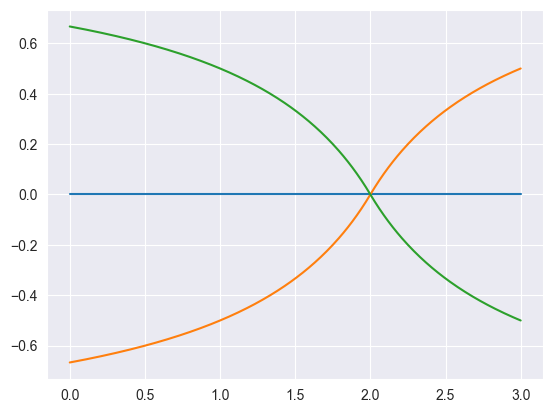

In [297]:
softsign_layer = tf.keras.layers.Dense(3, activation="softsign")
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.InputLayer(1),
        tf.keras.layers.Dense(
            3, kernel_initializer=tf.keras.initializers.constant(np.array([0, 4, -4]))
        ),
        softsign_layer,
    ]
)
model.set_weights(
    [
        np.array([[0, 1, -1]]),
        np.array([0, -2, 2]),
    ]
)

plt.plot(x, model.predict(x))

In [321]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.InputLayer(1),
        tf.keras.layers.Dense(
            20,
            activation="softsign",
            kernel_initializer=tf.keras.initializers.constant(
                np.r_[4, -4, np.random.randn(18)][:, None].T
            ),
            bias_initializer=tf.keras.initializers.constant(
                np.r_[-4, 8, np.random.randn(18)]
            ),
        ),
        tf.keras.layers.Dense(3, activation="elu"),
        tf.keras.layers.Dense(1, activation="elu"),
    ]
)
model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(1e-2), metrics=["mae"])
history = model.fit(x, y, validation_split=0.1, epochs=20, verbose=1)

Epoch 1/20
9/9 [==============================] - 0s 10ms/step - loss: 0.2548 - mae: 0.4195 - val_loss: 0.2546 - val_mae: 0.5046
Epoch 2/20
9/9 [==============================] - 0s 3ms/step - loss: 0.1515 - mae: 0.3622 - val_loss: 0.0059 - val_mae: 0.0766
Epoch 3/20
9/9 [==============================] - 0s 3ms/step - loss: 0.0995 - mae: 0.2862 - val_loss: 0.0586 - val_mae: 0.2418
Epoch 4/20
9/9 [==============================] - 0s 3ms/step - loss: 0.0694 - mae: 0.2167 - val_loss: 0.0179 - val_mae: 0.1328
Epoch 5/20
9/9 [==============================] - 0s 3ms/step - loss: 0.0462 - mae: 0.1608 - val_loss: 0.0352 - val_mae: 0.1867
Epoch 6/20
9/9 [==============================] - 0s 3ms/step - loss: 0.0364 - mae: 0.1495 - val_loss: 0.0436 - val_mae: 0.2079
Epoch 7/20
9/9 [==============================] - 0s 3ms/step - loss: 0.0324 - mae: 0.1264 - val_loss: 0.0482 - val_mae: 0.2187
Epoch 8/20
9/9 [==============================] - 0s 3ms/step - loss: 0.0305 - mae: 0.1277 - val_loss: 

10/10 [==============================] - 0s 556us/step


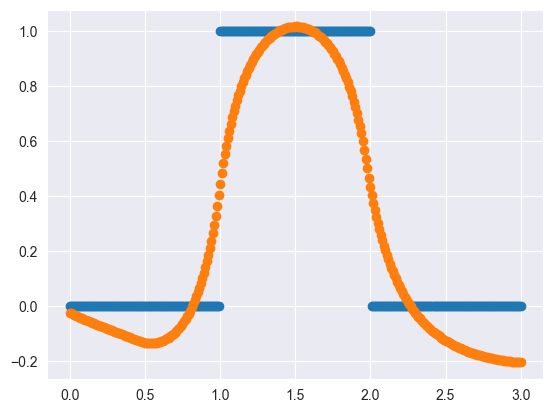

In [322]:
plt.scatter(x.ravel(), y)
plt.scatter(x.ravel(), model.predict(x))

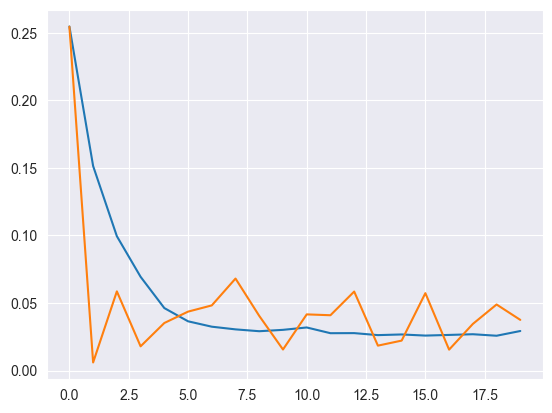

In [323]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])